In [ ]:
import numpy as np # operasi aljabar linier
import pandas as pd # digunakan untuk persiapan data
import plotly.express as px # digunakan untuk visualisasi data
from textblob import TextBlob # digunakan untuk analisis sentimen

df = pd.read_csv('/content/disney_plus_titles.csv')
df


df['Tanggal'] = df['date_added'].str[9:11]
df

df.sort_values(by='Tanggal', ascending=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Tanggal
119,s120,TV Show,Dug Days,NaN,"Bob Peterson, Ed Asner, Jordan Nagai",United States,"September 1, 2021",2021,TV-PG,1 Season,"Animation, Comedy, Family",“Dug Days” is a collection of shorts that foll...,1
99,s100,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,"September 17, 2021",2009,PG,106 min,"Comedy, Romance, Romantic Comedy",Becky writes a personal finance column en rout...,1
118,s119,TV Show,Alaska Animal Rescue,NaN,Victoria Vosburg,United States,"September 1, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Conservation heroes rescue and rehabilitate th...,1
111,s112,Movie,Twenty Something,Aphton Corbin,"Kaylin Price, Ariana Brown, Aliyah Taylor, Jan...",United States,"September 10, 2021",2021,PG,11 min,"Animation, Family","Adulting is hard. One day you're nailing it, t...",1
110,s111,Movie,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...","United States, United Kingdom","September 10, 2021",2011,PG-13,140 min,"Action-Adventure, Fantasy",A woman from his past uses Jack to help find t...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,s55,Movie,Bob Ballard: An Explorer's Life,NaN,NaN,NaN,"October 29, 2021",2021,TV-PG,44 min,"Biographical, Documentary","An intimate portrait of Bob Ballard, the legen...","9,"
55,s56,Movie,"McFarland, USA",Niki Caro,"Kevin Costner, Maria Bello, Morgan Saylor, Mar...",United States,"October 29, 2021",2015,PG,131 min,"Drama, Sports",A coach guides underdogs past tremendous obsta...,"9,"
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,NaN
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,NaN


,Tanggal,Data
0,6,-0.888477
1,21,-0.396916
2,22,-1.657188
3,9,-0.617995
4,12,-0.834085
5,21,0.135764
6,25,1.289857
7,21,-0.015292
8,5,-1.644994
9,11,2.324030


In [ ]:
df.shape # Memeriksa jumlah baris dan kolom dalam data

(1450, 12)

In [ ]:
df.head() # Untuk Menampilkan 5 baris pertama

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
# Untuk menghitung jumlah elemen di dalam dataset
total_elemen = df.size
print("Jumlah total elemen dalam DataFrame: ", total_elemen)

Jumlah total elemen dalam DataFrame:  17400


In [ ]:
# untuk menampilan tipe data setiap element nya
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# untuk menampilkan index, kolom, dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
# untuk mengecek apakah ada yang ter duplikat atau double
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# untuk menampilkan value nukk di dalam dataset
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,False,False,False,False,False,False,False,False,False,False,False,False
1446,False,False,False,False,False,False,False,False,False,False,False,False
1447,False,False,False,False,False,False,False,False,False,False,False,False
1448,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# menampilkan berapa value null di dalam kolom
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<Axes: >

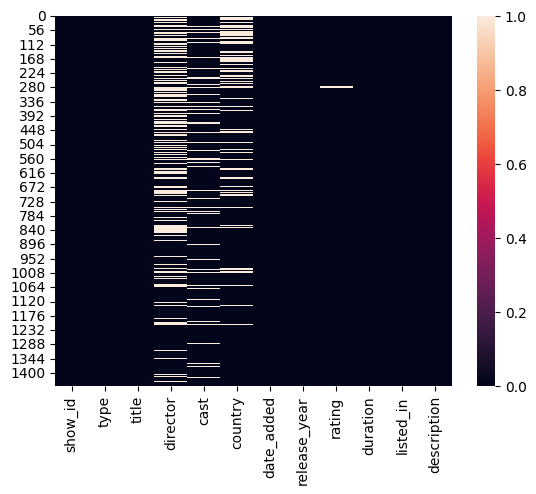

In [ ]:
# menggunakan heatmap untuk menampilkan nilai null

import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
# Untuk menampilkan nama kolom yang ada di dalam dataset
nama_kolom = df.columns
print("Nama kolom dalam DataFrame: ", nama_kolom)

Nama kolom dalam DataFrame:  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# df.groupby Untuk mengelompokkan data dalam dataset berdasarkan kolom 'rating'.
# size() untuk menghitung jumlah elemen dalam setiap kelompok rating.
# Hasilnya kemudian direset indeksnya menggunakan reset_index() dan diberi nama kolom baru 'counts'.

x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

     rating  counts
0         G     253
1        PG     236
2     PG-13      66
3     TV-14      79
4      TV-G     318
5     TV-PG     301
6      TV-Y      50
7     TV-Y7     131
8  TV-Y7-FV      13


In [ ]:
# Membuat Piechart berdasarkan rating Konten

pieChart = px.pie(x, values='counts', names='rating', title='Distribution of content ratings on Disney+')
pieChart.show()

In [ ]:
# untuk mengisi data yang tidak lengkap atau kosong.
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,Director not specified,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
# directors_list = pd.DataFrame(): Membuat DataFrame kosong dengan nama directors_list menggunakan pandas.
# print(directors_list): Menampilkan DataFrame kosong tersebut.

directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
# df['director'].str.split(',', expand=True): Memisahkan nilai dalam kolom 'director' berdasarkan koma (',') menjadi kolom-kolom baru menggunakan fungsi str.split()
# .stack(): Mengonversi kolom-kolom yang dihasilkan dari langkah sebelumnya menjadi bentuk stacked (ditumpuk), menghasilkan satu kolom dengan indeks bertingkat (multi-level index).
# print(directors_list): Menampilkan hasilnya, yaitu DataFrame yang telah ditumpuk.

directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0    Alonso Ramirez Ramos
      1             Dave Wasson
1     0             John Cherry
2     0            Karen Disher
3     0         Hamish Hamilton
                   ...         
1445  0              Gavin Hood
1446  0              Shawn Levy
1447  0         Dexter Fletcher
1448  0         Gurinder Chadha
1449  0             Mark Waring
Length: 1594, dtype: object


In [ ]:
directors_list.columns = ['Director']
print(directors_list)

0     0    Alonso Ramirez Ramos
      1             Dave Wasson
1     0             John Cherry
2     0            Karen Disher
3     0         Hamish Hamilton
                   ...         
1445  0              Gavin Hood
1446  0              Shawn Levy
1447  0         Dexter Fletcher
1448  0         Gurinder Chadha
1449  0             Mark Waring
Length: 1594, dtype: object


# Analisis 5 Aktor teratas di Disney+

In [ ]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Disney+')
barChart2.show()

# Analisis konten yang diproduksi di Disney+ berdasarkan tahun

In [ ]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [ ]:
print(df2)

     Release Year     Type  Total Count
0            1928    Movie            1
1            1932    Movie            3
2            1933    Movie            3
3            1934    Movie            4
4            1935    Movie            4
..            ...      ...          ...
125          2019  TV Show           38
126          2020    Movie           74
127          2020  TV Show           40
128          2021    Movie           70
129          2021  TV Show           55

[130 rows x 3 columns]


In [ ]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Disney+ Every Year")
graph.show()

#Analisis Konten Disney+

In [ ]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Analisis Konten Disney+")
barGraph.show()

In [ ]:
df.groupby('title').title.count()

title
10 Things I Hate About You                     1
101 Dalmatian Street                           1
101 Dalmatians                                 1
101 Dalmatians (Series)                        1
101 Dalmatians II: Patch's London Adventure    1
                                              ..
Zenon: Girl of the 21st Century                1
Zenon: The Zequel                              1
Zenon: Z3                                      1
Zombies: Addison's Moonstone Mystery           1
Zootopia                                       1
Name: title, Length: 1450, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      1450 non-null   object
 4   cast          1450 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df2 = df[(df['country'].isin(['United States'])) & (df['type'] == 'TV Show')]
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,TV Show,Port Protection Alaska,Director not specified,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,Director not specified,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",Director not specified,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
52,s53,TV Show,Photo Ark,Director not specified,Joel Sartore,United States,"November 3, 2021",2017,TV-PG,1 Season,"Animals & Nature, Docuseries, Family",National Geographic photographer Joel Sartore ...
78,s79,TV Show,IMPACT with Gal Gadot,Director not specified,Gal Gadot,United States,"October 6, 2021",2021,TV-14,1 Season,Docuseries,National Geographic Presents IMPACT with Gal G...
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,Director not specified,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,"November 12, 2019",2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...
1417,s1418,TV Show,X-Men: Evolution,Director not specified,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,"November 12, 2019",2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1434,s1435,TV Show,Smart Guy,Director not specified,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,"October 1, 2019",1996,TV-G,3 Seasons,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
1439,s1440,TV Show,Disney Kirby Buckets,Director not specified,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,Director not specified,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
